## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. X Education needs a way to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires a model to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Dataset

The dataset used is `Leads.csv` provided by X Education

In [1]:
#Importing the required packages for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import scale
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
# Importing dataset
lead_score = pd.read_csv("Leads.csv")

#to print all the columns, set the max_columns to 500
pd.set_option('display.max_columns', 500)
lead_score.shape

(9240, 37)

In [3]:
#Full Summary of the dataset
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [4]:
#Describe dataset
lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
#Reading the first n rows of the dataset
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Finding and treating null values

In [6]:
#Finding null values
lead_score.isnull().any()

Prospect ID                                      False
Lead Number                                      False
Lead Origin                                      False
Lead Source                                       True
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                       True
Total Time Spent on Website                      False
Page Views Per Visit                              True
Last Activity                                     True
Country                                           True
Specialization                                    True
How did you hear about X Education                True
What is your current occupation                   True
What matters most to you in choosing a course     True
Search                                           False
Magazine                                         False
Newspaper 

In [7]:
#Finding the rows having null values
lead_score.isnull().any(axis=1).sum()

7297

In [8]:
#Select the columns with null values
lead_score.columns[lead_score.isna().any()].tolist()

['Lead Source',
 'TotalVisits',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [9]:
#Get the total no. of null values in each column
lead_score.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
#Get the percentage of null values in each column
print (round((lead_score.isnull().sum() * 100/ len(lead_score)),2).sort_values(ascending=False))

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Tags                                             36.29
What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Cal

`We could drop the columns that has more than 30% missing data.  But before treating them, let's visualize the data, and based on the correlation we can decide on how to proceed`

In [11]:
#No. of unique records
for col in lead_score:
    print(lead_score[col].name)
    print(lead_score[col].unique())

Prospect ID
['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']
Lead Number
[660737 660728 660727 ... 579545 579538 579533]
Lead Origin
['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']
Lead Source
['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
Do Not Email
['No' 'Yes']
Do Not Call
['No' 'Yes']
Converted
[0 1]
TotalVisits
[  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251.  32.  

In [12]:
# Deleting 'Prospect ID' since we don't need it for our model
lead_score = lead_score.drop('Prospect ID', axis=1)

In [13]:
#Select columns with more than 30% null values
ncols = lead_score.columns[round((lead_score.isnull().sum() * 100/ len(lead_score)),2) > 30].tolist()
ncols

['Tags',
 'Lead Quality',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

Keeping `Lead Quality` since that might be useful for our model, and dropping `Asymmetrique Activity Score, Asymmetrique Profile Score` since the `Asymmetrique Activity Index, Asymmetrique Profile Index` can be used to get the score

In [14]:
#Create a new dataframe removing the selected columns
lead_score = lead_score[lead_score.columns[~lead_score.columns.isin(['Tags','Asymmetrique Activity Score','Asymmetrique Profile Score'])]]
lead_score.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [15]:
#No of duplicate records
len(lead_score[lead_score.duplicated()].index)

0

In [16]:
#Check dataset after removing columns
lead_score.shape

(9240, 33)

In [17]:
#Check the number of unique values in each column
asc = lead_score.nunique()
asc.sort_values(ascending=False)

Lead Number                                      9240
Total Time Spent on Website                      1731
Page Views Per Visit                              114
TotalVisits                                        41
Country                                            38
Lead Source                                        21
Specialization                                     19
Last Activity                                      17
Last Notable Activity                              16
How did you hear about X Education                 10
City                                                7
What is your current occupation                     6
Lead Profile                                        6
Lead Origin                                         5
Lead Quality                                        5
What matters most to you in choosing a course       3
Asymmetrique Activity Index                         3
Asymmetrique Profile Index                          3
Newspaper Article           

We can delete columns that have only one/two unique values and which will not be useful for our model. Columns `Digital Advertisement, Through Recommendations, Newspaper Article, X Education Forums, Newspaper, Search, and Magazine` are about the channels through which the customer has come to know about X Education.  This can be taken from `How did you hear about X Education` column.  Hence we will remove the above mentioned list of columns.  Also columns, `What matters most to you in choosing a course, Do Not Email, Do Not Call, Update me on Supply Chain Content, and I agree to pay the amount through cheque` doesn't provide much insights for our model.  So, we will be dropping those as well.

In [18]:
#Dropping columns
lead_score = lead_score.drop(columns = ['What matters most to you in choosing a course','Digital Advertisement','Do Not Email','Do Not Call','Through Recommendations','Newspaper Article','X Education Forums','Newspaper','Search','Update me on Supply Chain Content','Get updates on DM Content','Receive More Updates About Our Courses','Magazine','I agree to pay the amount through cheque'])
lead_score.shape

(9240, 19)

#### Treating null/nan values

In [19]:
#Getting the total no. of null values in each column again to treat them
lead_score.isnull().sum().sort_values(ascending=False)

Lead Quality                              4767
Asymmetrique Profile Index                4218
Asymmetrique Activity Index               4218
Lead Profile                              2709
What is your current occupation           2690
Country                                   2461
How did you hear about X Education        2207
Specialization                            1438
City                                      1420
Page Views Per Visit                       137
TotalVisits                                137
Last Activity                              103
Lead Source                                 36
Converted                                    0
Lead Origin                                  0
Last Notable Activity                        0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Lead Number                                  0
dtype: int64

We will start treating columns in the order of higher null values

In [20]:
#Starting with Lead Number
lead_score['Lead Quality'].unique()

array(['Low in Relevance', nan, 'Might be', 'Not Sure', 'Worst',
       'High in Relevance'], dtype=object)

In [21]:
#Impute nan with 'NA'
lead_score['Lead Quality'].fillna("NA", inplace = True)
lead_score['Lead Quality'].unique()

array(['Low in Relevance', 'NA', 'Might be', 'Not Sure', 'Worst',
       'High in Relevance'], dtype=object)

In [22]:
#Imputing Asymmetrique Profile Index
lead_score['Asymmetrique Profile Index'].fillna("NA", inplace = True)
lead_score['Asymmetrique Profile Index'].unique()

array(['02.Medium', '01.High', '03.Low', 'NA'], dtype=object)

In [23]:
#Imputing Asymmetrique Activity Index
lead_score['Asymmetrique Activity Index'].fillna("NA", inplace = True)
lead_score['Asymmetrique Activity Index'].unique()

array(['02.Medium', '01.High', '03.Low', 'NA'], dtype=object)

In [24]:
#Impute Lead Profile
lead_score['Lead Profile'].fillna("NA", inplace = True)
lead_score['Lead Profile'].unique()

array(['Select', 'Potential Lead', 'NA', 'Other Leads', 'Lateral Student',
       'Dual Specialization Student', 'Student of SomeSchool'],
      dtype=object)

In [25]:
#Impute 'What is your current occupation'
lead_score['What is your current occupation'].fillna("NA", inplace = True)
lead_score['What is your current occupation'].unique()

array(['Unemployed', 'Student', 'NA', 'Working Professional',
       'Businessman', 'Other', 'Housewife'], dtype=object)

In [26]:
#Impute Country
lead_score['Country'].fillna("Unknown", inplace = True)
lead_score['Country'].unique()

array(['Unknown', 'India', 'Russia', 'Kuwait', 'Oman',
       'United Arab Emirates', 'United States', 'Australia',
       'United Kingdom', 'Bahrain', 'Ghana', 'Singapore', 'Qatar',
       'Saudi Arabia', 'Belgium', 'France', 'Sri Lanka', 'China',
       'Canada', 'Netherlands', 'Sweden', 'Nigeria', 'Hong Kong',
       'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya', 'Italy',
       'South Africa', 'Tanzania', 'unknown', 'Malaysia', 'Liberia',
       'Switzerland', 'Denmark', 'Philippines', 'Bangladesh', 'Vietnam',
       'Indonesia'], dtype=object)

In [27]:
#Impute How did you hear about X Education with NA for nan values and replace 'Select' with NA as well
lead_score['How did you hear about X Education'].fillna("NA", inplace = True)
lead_score['How did you hear about X Education'].replace('Select', 'NA', inplace =True)
lead_score['How did you hear about X Education'].unique()

array(['NA', 'Word Of Mouth', 'Other', 'Online Search',
       'Multiple Sources', 'Advertisements', 'Student of SomeSchool',
       'Email', 'Social Media', 'SMS'], dtype=object)

In [28]:
#Impute Specialization with NA for nan values and replace 'Select' with NA as well
lead_score['Specialization'].fillna("Unknown", inplace = True)
lead_score['Specialization'].replace('Select', 'Unknown', inplace =True)
lead_score['Specialization'].unique()

array(['Unknown', 'Business Administration', 'Media and Advertising',
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [29]:
#Impute Country with NA for nan values and replace 'Select' with NA as well
lead_score['City'].fillna("Unknown", inplace = True)
lead_score['City'].replace('Select', 'Unknown', inplace =True)
lead_score['City'].unique()

array(['Unknown', 'Mumbai', 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [30]:
#Impute Page Views Per Visit with median for null values
lead_score['Page Views Per Visit'].fillna(lead_score['Page Views Per Visit'].median(), inplace = True)
lead_score['Page Views Per Visit'].unique()

array([ 0.  ,  2.5 ,  2.  ,  1.  ,  4.  ,  8.  ,  2.67, 11.  ,  5.  ,
        6.  ,  3.  ,  1.33,  1.5 ,  3.5 ,  7.  ,  2.33, 13.  ,  8.5 ,
        5.5 ,  1.67,  4.5 ,  3.33, 16.  , 12.  ,  1.71,  1.8 ,  6.5 ,
        4.33, 14.  ,  3.4 , 10.  ,  1.25,  1.75,  2.63, 15.  ,  2.25,
        3.67,  1.43,  9.  ,  2.6 ,  4.75,  1.27,  3.25,  5.33,  2.57,
        2.17,  2.75,  2.8 ,  2.2 ,  2.86,  3.91,  1.4 ,  5.67,  3.2 ,
        1.38,  2.09,  2.4 , 55.  ,  5.25,  6.71,  3.57,  2.22,  1.83,
        3.6 ,  1.2 ,  1.57,  1.56,  5.4 ,  4.25,  1.31,  1.6 ,  2.9 ,
        1.23,  1.78,  3.83,  7.5 ,  1.14,  2.71,  1.45,  2.38,  1.86,
        2.29,  1.21, 12.33,  3.43,  2.56,  6.33,  1.64,  8.21,  4.4 ,
        3.17,  8.33,  1.48,  1.22, 24.  ,  3.75,  6.67,  1.54,  2.13,
        2.14,  2.45,  3.29,  4.17,  1.63,  3.38,  1.17, 14.5 ,  3.8 ,
        1.19,  3.82,  2.83,  1.93, 11.5 ,  2.08])

In [31]:
#Impute TotalVisits with median for null values
lead_score['TotalVisits'].fillna(lead_score['TotalVisits'].median(), inplace = True)
lead_score['TotalVisits'].unique()

array([  0.,   5.,   2.,   1.,   4.,   8.,  11.,   6.,   3.,   7.,  13.,
        17.,   9.,  12.,  10.,  16.,  14.,  21.,  15.,  22.,  19.,  18.,
        20.,  43.,  30.,  23.,  55., 141.,  25.,  27.,  29.,  24.,  28.,
        26.,  74.,  41.,  54., 115., 251.,  32.,  42.])

In [32]:
#Impute TotalVisits with NA
lead_score['Last Activity'].fillna("NA", inplace = True)
lead_score['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked', 'NA',
       'Approached upfront', 'SMS Sent', 'Visited Booth in Tradeshow',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [33]:
#Impute TotalVisits with NA
lead_score['Lead Source'].fillna("NA", inplace = True)
lead_score['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', 'NA', 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

In [34]:
#Re-check dataset for null values
lead_score.isnull().sum().sort_values(ascending=False)

Last Notable Activity                     0
Country                                   0
Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
A free copy of Mastering The Interview    0
How did you hear about X Education        0
What is your current occupation           0
Lead Quality                              0
Lead Profile                              0
City                                      0
Asymmetrique Activity Index               0
Asymmetrique Profile Index                0
Lead Number                               0
dtype: int64

In [35]:
#Replace Lead Profile value 'Select' with NA as well
lead_score['Lead Profile'].replace('Select', 'NA', inplace =True)
lead_score['Lead Profile'].unique()

array(['NA', 'Potential Lead', 'Other Leads', 'Lateral Student',
       'Dual Specialization Student', 'Student of SomeSchool'],
      dtype=object)

## Data Analysis

Let's plot some of the variables and analyse the trends

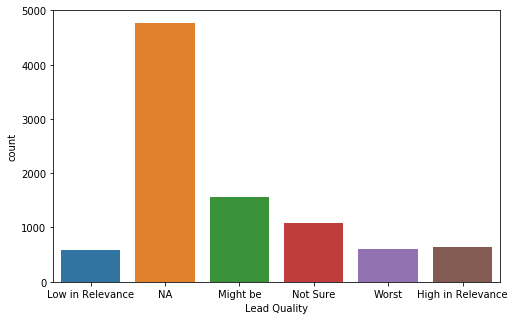

In [36]:
#Plotting Lead Quality
plt.figure(figsize=(8,5))
sns.countplot(x='Lead Quality', data=lead_score)
plt.show()

Most of the values are unknown, and the next highest is `Might be`

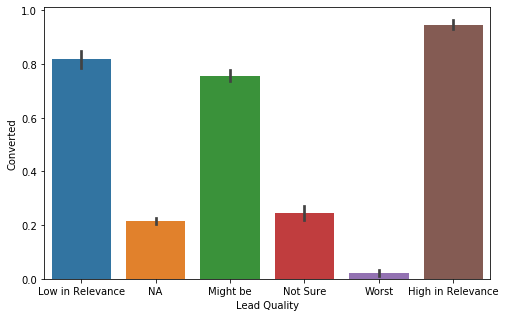

In [37]:
#Plotting Lead Quality with Converted
plt.figure(figsize=(8,5))
sns.barplot(x='Lead Quality', y='Converted', data=lead_score)
plt.show()

`High in Relevance`, `Low in Relevance`, and `Might be` as expected are the ones that are most likely to convert

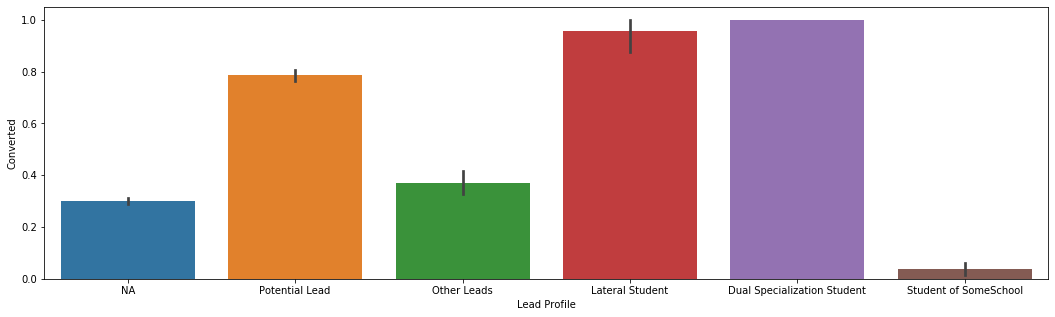

In [38]:
#Comparing Converted ratio with Lead Profile
plt.figure(figsize=(18,5))
sns.barplot(x='Lead Profile', y='Converted', data=lead_score)
plt.show()

Lead profiles `Dual Specialization Student`, `Lateral Student`, and `Potential leads` are most likely to convert

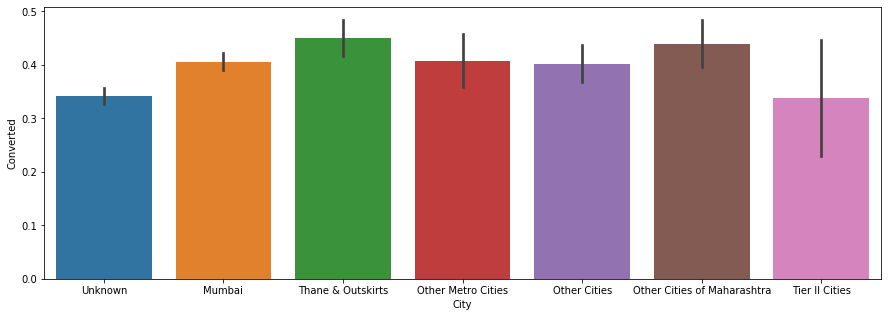

In [39]:
#Comparing Converted ratio by City
plt.figure(figsize=(15,5))
sns.barplot(x='City', y='Converted', data=lead_score)
plt.show()

`Thane & Outskirts`, `Other Cities of Maharashtra`, `Mumbai` are the top three cities where are there higher chances of customers getting converted

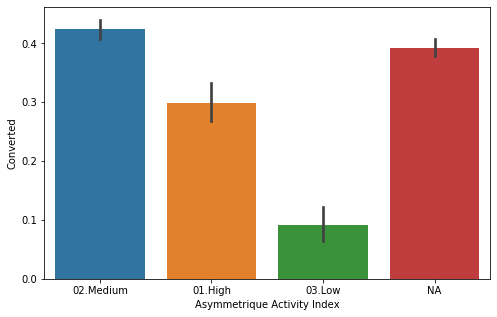

In [40]:
#Comparing Converted ratio with Activity Index
plt.figure(figsize=(8,5))
sns.barplot(x='Asymmetrique Activity Index', y='Converted', data=lead_score)
plt.show()

`Medium` activity index has higher chances to get converted, while the next major set of activity that could be converted is `NA`

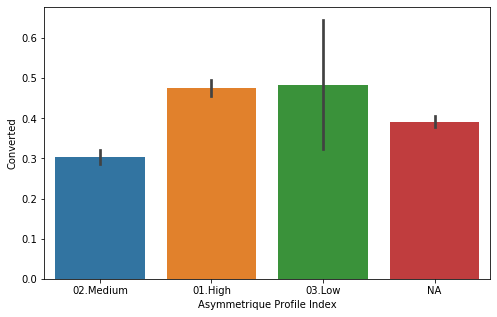

In [41]:
#Comparing Converted ratio with Profile Index
plt.figure(figsize=(8,5))
sns.barplot(x='Asymmetrique Profile Index', y='Converted', data=lead_score)
plt.show()

`High` and `Low` Profile Index are most likely to get converted

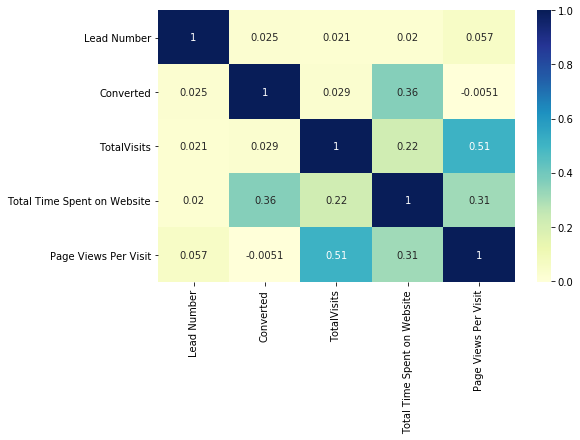

In [42]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (8, 5))
sns.heatmap(lead_score.corr(), annot = True, cmap="YlGnBu")
plt.show()

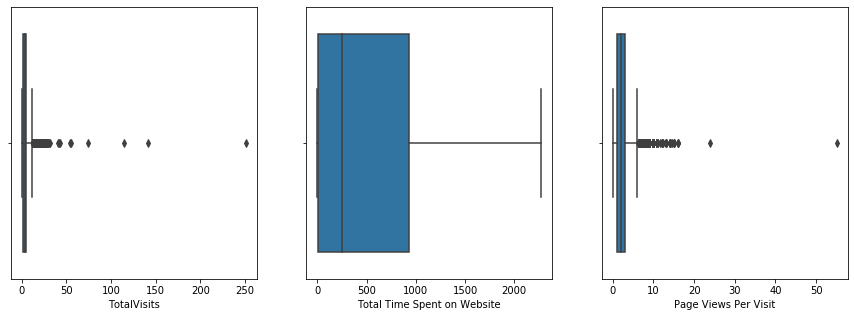

In [43]:
#Checking for Outliers
fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(15,5))
sns.boxplot(x='TotalVisits', data = lead_score, ax=ax[0])
sns.boxplot(x='Total Time Spent on Website', data=lead_score, ax=ax[1])
sns.boxplot(x='Page Views Per Visit', data=lead_score, ax=ax[2])
plt.show()

`TotalVisits` and `Page Views Per Visit` have outliers, but will not treat them now

## Data Preparation

`Let's convert categorical variables to numerical variables by mapping and creating dummies`

In [44]:
#First let's map A free copy of Mastering The Interview to 0s and 1s
lead_score['A free copy of Mastering The Interview'] = lead_score['A free copy of Mastering The Interview'].map({'Yes': 1, 'No': 0})

In [45]:
lead_score['Asymmetrique Activity Index'].unique()

array(['02.Medium', '01.High', '03.Low', 'NA'], dtype=object)

In [46]:
#Converting Asymmetrique Indexes to numeric

def index_range_f(val):
    if val == '01.High':
        return 1
    elif val == '02.Medium':
        return 2
    elif val == '03.Low':
        return 3
    elif val == 'NA':
        return 4
    
    
lead_score['Asymmetrique_Activity_Index'] = lead_score['Asymmetrique Activity Index'].apply(index_range_f) 
lead_score['Asymmetrique_Profile_Index'] = lead_score['Asymmetrique Profile Index'].apply(index_range_f) 
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
Lead Number                               9240 non-null int64
Lead Origin                               9240 non-null object
Lead Source                               9240 non-null object
Converted                                 9240 non-null int64
TotalVisits                               9240 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9240 non-null float64
Last Activity                             9240 non-null object
Country                                   9240 non-null object
Specialization                            9240 non-null object
How did you hear about X Education        9240 non-null object
What is your current occupation           9240 non-null object
Lead Quality                              9240 non-null object
Lead Profile                              9240 non-null object
City        

In [47]:
#Get the list of categorical variables

cat_vars = lead_score.select_dtypes(include=['object']).columns
cat_vars

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Lead Quality', 'Lead Profile',
       'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Last Notable Activity'],
      dtype='object')

In [48]:
# Creating dummy variables

# Creating a dummy variable for 'Lead Origin'
cont = pd.get_dummies(lead_score['Lead Origin'],prefix='Lead Origin',drop_first=True)
#Adding the results to the master dataframe
lead_score = pd.concat([lead_score,cont],axis=1)


# Creating a dummy variable for 'Lead Source'
cont = pd.get_dummies(lead_score['Lead Source'],prefix='Lead Source',drop_first=True)
#Adding the results to the master dataframe
lead_score = pd.concat([lead_score,cont],axis=1)  

# Creating a dummy variable for 'Last Activity'
cont = pd.get_dummies(lead_score['Last Activity'],prefix='Last Activity',drop_first=True)
#Adding the results to the master dataframe
lead_score = pd.concat([lead_score,cont],axis=1)

# Creating a dummy variable for 'Country'
cont = pd.get_dummies(lead_score['Country'],prefix='Country',drop_first=True)
#Adding the results to the master dataframe
lead_score = pd.concat([lead_score,cont],axis=1)

# Creating a dummy variable for 'Specialization'
cont = pd.get_dummies(lead_score['Specialization'],prefix='Specialization',drop_first=True)
#Adding the results to the master dataframe
lead_score = pd.concat([lead_score,cont],axis=1)

# Creating a dummy variable for 'How did you hear about X Education'
cont = pd.get_dummies(lead_score['How did you hear about X Education'],prefix='How did you hear about X Education',drop_first=True)
#Adding the results to the master dataframe
lead_score = pd.concat([lead_score,cont],axis=1)

# Creating a dummy variable for 'What is your current occupation'
cont = pd.get_dummies(lead_score['What is your current occupation'],prefix='What is your current occupation',drop_first=True)
#Adding the results to the master dataframe
lead_score = pd.concat([lead_score,cont],axis=1)

# Creating a dummy variable for 'City'
cont = pd.get_dummies(lead_score['City'],prefix='City',drop_first=True)
#Adding the results to the master dataframe
lead_score = pd.concat([lead_score,cont],axis=1)

# Creating a dummy variable for 'LLead Profile'
cont = pd.get_dummies(lead_score['Lead Profile'],prefix='Lead Profile',drop_first=True)
#Adding the results to the master dataframe
lead_score = pd.concat([lead_score,cont],axis=1)

# Creating a dummy variable for Last Notable Activity'
cont = pd.get_dummies(lead_score['Last Notable Activity'],prefix='Last Notable Activity',drop_first=True)
#Adding the results to the master dataframe
lead_score = pd.concat([lead_score,cont],axis=1)

In [49]:
lead_score.shape

(9240, 160)

In [50]:
#since we created dummies for certain variables, we will drop those
lead_score = lead_score.drop(cat_vars,axis = 1)
lead_score.shape

(9240, 147)

In [51]:
#delete variables with NA/Unknown
lead_score = lead_score.drop(['Lead Source_NA','Last Activity_NA','Country_unknown','Specialization_Unknown','How did you hear about X Education_NA','What is your current occupation_NA','City_Unknown','Lead Profile_NA'],axis = 1)
lead_score.shape

(9240, 139)

In [52]:
lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Asymmetrique_Activity_Index,Asymmetrique_Profile_Index,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Unknown,Country_Vietnam,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9240.000000,9240.000000,9240.00000

## Split data to Test-Train

In [53]:
#Features to model 
#Let's drop the unnecessary variables
X = lead_score.drop(['Lead Number','Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Asymmetrique_Activity_Index,Asymmetrique_Profile_Index,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Unknown,Country_Vietnam,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,2,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,

In [54]:
# Get the dependent variable in y
y = lead_score['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [55]:
#Lead Conversion Rate
converted = (sum(lead_score['Converted'])/len(lead_score['Converted'].index))*100
converted

38.53896103896104

In [56]:
#Split test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [57]:
#scaling continuous variables in the dataset
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Asymmetrique_Activity_Index,Asymmetrique_Profile_Index,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Unknown,Country_Vietnam,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,-0.656434,-0.885371,-1.085519,0,2,2,0,0,0,0,0,0,0,0,0,1,0

## Building a Model

In [58]:
import statsmodels.api as sm

In [59]:
# Logistic regression model
log_v1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
log_v1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                          127
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 06 Oct 2019   Deviance:                          nan
Time:                        16:50:17   Pearson chi2:                 7.94e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                    -1.051e+15   4.43e+07  -2.37e+07      0.000   -1.05e+15   -1.05e+15
TotalVisits                                               6.342e+13   9.95e+05   6.37e+07      0.000    6.34e+13    6.34e+13
Total Time Spent on Website                               6.674e+14   9.63e+05   6.93e+08      0.000    6.67e+14    6.67e+14
Page Views Per Visit                                     -1.164e+14   1.19e+06  -9.79e+07      0.000   -1.16e+14   -1.16e+14
A free copy of Mastering The Interview                    8.415e+13   3.22e+06   2.62e+07      0.000    8.42e+13    8.42e+13
Asymmetrique_Activity_Index                              -2.599e+14   2.01e+06   -1.3e+08      0.000    -2.6e+14    -2.6e+14
Asymmetrique_Profile_Index                                2.361e+14   1.78e+06   1.33e+08      0.000    2.36e+14    2.36e+14
Lead Origin_Landing Page Submission                      -3.421e+14   3.96e+06  -8.65e+07      0.000   -3.42e+14   -3.42e+14
Lead Origin_Lead Add Form                                 1.518e+15   3.66e+07   4.14e+07      0.000    1.52e+15    1.52e+15
Lead Origin_Lead Import                                  -3.471e+14    5.3e+07  -6.55e+06      0.000   -3.47e+14   -3.47e+14
Lead Origin_Quick Add Form                                1.044e+15   7.88e+07   1.32e+07      0.000    1.04e+15    1.04e+15
Lead Source_Direct Traffic                                1.863e+14   3.83e+07   4.86e+06      0.000    1.86e+14    1.86e+14
Lead Source_Facebook                                      6.161e+14   5.23e+07   1.18e+07      0.000    6.16e+14    6.16e+14
Lead Source_Google                                        4.368e+14   3.82e+07   1.14e+07      0.000    4.37e+14    4.37e+14
Lead Source_Live Chat                                     3.386e+15   4.92e+07   6.89e+07      0.000    3.39e+15    3.39e+15
Lead Source_NC_EDM                                        4.715e+15   7.74e+07   6.09e+07      0.000    4.71e+15    4.71e+15
Lead Source_Olark Chat                                    6.249e+14   3.82e+07   1.64e+07      0.000    6.25e+14    6.25e+14
Lead Source_Organic Search                                3.359e+14   3.83e+07   8.77e+06      0.000    3.36e+14    3.36e+14
Lead Source_Pay per Click Ads                            -3.755e+15   7.75e+07  -4.85e+07      0.000   -3.76e+15   -3.76e+15
Lead Source_Press_Release                                -3.329e+15   6.15e+07  -5.42e+07      0.000   -3.33e+15   -3.33e+15
Lead Source_Reference                                     2.606e+14   1.32e+07   1.97e+07      0.000    2.61e+14    2.61e+14
Lead Source_Referral Sites                                2.541e+14   3.88e+07   6.

## Feature selection using RFE

In [60]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [61]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             
rfe = rfe.fit(X_train, y_train)

In [62]:
rfe.support_

array([False,  True, False, False, False, False, False,  True, False,
       False,  True, False,  True, False, False, False,  True, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False,  True, False,  True,  True, False, False, False, False,
       False, False,

In [63]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 77),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 78),
 ('A free copy of Mastering The Interview', False, 96),
 ('Asymmetrique_Activity_Index', False, 21),
 ('Asymmetrique_Profile_Index', False, 22),
 ('Lead Origin_Landing Page Submission', False, 41),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 25),
 ('Lead Origin_Quick Add Form', False, 86),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 5),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 56),
 ('Lead Source_NC_EDM', False, 33),
 ('Lead Source_Olark Chat', False, 110),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 73),
 ('Lead Source_Press_Release', False, 20),
 ('Lead Source_Reference', False, 52),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 60),
 ('Lead Source_WeLearn', False, 87),
 ('Lead Source_Welingak Website', True, 1),
 

In [64]:
col = X_train.columns[rfe.support_]

In [65]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Asymmetrique_Activity_Index',
       'Asymmetrique_Profile_Index', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Facebook', 'Lead Source_Live Chat',
       ...
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=117)

Assessing the model with statsmodel

In [66]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2510.6
Date:                Sun, 06 Oct 2019   Deviance:                       5021.1
Time:                        16:50:20   Pearson chi2:                 8.43e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3685      0.093     -3.977      0.000      -0.550      -0.187
Total Time Spent on Website                              1.0995      0.041     26.961      0.000       1.020       1.179
Lead Origin_Lead Add Form                                2.0958      0.201     10.426      0.000       1.702       2.490
Lead Source_Direct Traffic                              -1.4075      0.117    -12.045      0.000      -1.637      -1.178
Lead Source_Google                                      -0.9782      0.111     -8.847      0.000      -1.195      -0.761
Lead Source_Organic Search                              -1.1894      0.136     -8.748      0.000      -1.456      -0.923
Lead Source_Referral Sites                              -1.1137      0.328     -3.394      0.001      -1.757      -0.470
Lead Source_Welingak Website                             2.5335      0.745      3.400      0.001       1.073       3.994
Last Activity_Email Bounced                             -1.2346      0.306     -4.036      0.000      -1.834      -0.635
Last Activity_Had a Phone Conversation                   1.8352      0.673      2.727      0.006       0.516       3.154
Last Activity_SMS Sent                                   1.2733      0.077     16.618      0.000       1.123       1.424
Country_Qatar                                          -22.8844   2.39e+04     -0.001      0.999   -4.69e+04    4.68e+04
Country_Saudi Arabia                                    -1.4564      0.866     -1.682      0.093      -3.153       0.240
What is your current occupation_Housewife               24.2065   2.22e+04      0.001      0.999   -4.35e+04    4.36e+04
What is your current occupation_Working Professional     2.5411      0.193     13.146      0.000       2.162       2.920
Lead Profile_Lateral Student                             3.1449      1.084      2.902      0.004       1.021       5.269
Lead Profile_Potential Lead                              1.7822      0.099     17.994      0.000       1.588       1.976
Lead Profile_Student of SomeSchool                      -1.7390      0.447     -3.892      0.000      -2.615      -0.863
Last Notable Activity_Modified                          -1.0906      0.082    -13.347      0.000      -1.251      -0.930
Last Notable Activity_Olark Chat Conversation           -1.2716      0.335     -3.793      0.000      -1.929      -0.615
Last Notable Activity_Unreachable                        1.2838      0.554      2.316      0.021       0.197       2.370
========================================================================================================================
"""

In [67]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.207180
6795    0.145579
3516    0.244392
8105    0.806559
3934    0.080721
4844    0.997182
3297    0.086242
8071    0.998510
987     0.129368
7423    0.979765
dtype: float64

In [68]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20717999, 0.14557909, 0.24439217, 0.80655869, 0.08072073,
       0.9971822 , 0.08624155, 0.99851024, 0.12936811, 0.97976537])

##### Creating a dataframe with the convertion and the predicted probabilities

In [69]:
y_train_pred_final = pd.DataFrame({'Conversion':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Conversion,Conversion_Prob,LeadID
0,0,0.207180,1871
1,0,0.145579,6795
2,0,0.244392,3516
3,0,0.806559,8105
4,0,0.080721,3934


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [70]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Conversion,Conversion_Prob,LeadID,predicted
0,0,0.207180,1871,0
1,0,0.145579,6795,0
2,0,0.244392,3516,0
3,0,0.806559,8105,1
4,0,0.080721,3934,0


In [71]:
from sklearn import metrics

In [72]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.predicted )
print(confusion)

[[3585  417]
 [ 740 1726]]


In [73]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

0.8211193568336426


### Check VIF

In [74]:
# Check for the VIF values of the feature variables to decide on the final no of variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.65
9,Last Activity_SMS Sent,1.50
17,Last Notable Activity_Modified,1.48
3,Lead Source_Google,1.47
15,Lead Profile_Potential Lead,1.42
2,Lead Source_Direct Traffic,1.40
6,Lead Source_Welingak Website,1.26
13,What is your current occupation_Working Profes...,1.23
4,Lead Source_Organic Search,1.18
0,Total Time Spent on Website,1.14


In [76]:
# create model again
X_train_sm = sm.add_constant(X_train[col])
log_v2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_v2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2510.6
Date:                Sun, 06 Oct 2019   Deviance:                       5021.1
Time:                        16:50:21   Pearson chi2:                 8.43e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3685      0.093     -3.977      0.000      -0.550      -0.187
Total Time Spent on Website                              1.0995      0.041     26.961      0.000       1.020       1.179
Lead Origin_Lead Add Form                                2.0958      0.201     10.426      0.000       1.702       2.490
Lead Source_Direct Traffic                              -1.4075      0.117    -12.045      0.000      -1.637      -1.178
Lead Source_Google                                      -0.9782      0.111     -8.847      0.000      -1.195      -0.761
Lead Source_Organic Search                              -1.1894      0.136     -8.748      0.000      -1.456      -0.923
Lead Source_Referral Sites                              -1.1137      0.328     -3.394      0.001      -1.757      -0.470
Lead Source_Welingak Website                             2.5335      0.745      3.400      0.001       1.073       3.994
Last Activity_Email Bounced                             -1.2346      0.306     -4.036      0.000      -1.834      -0.635
Last Activity_Had a Phone Conversation                   1.8352      0.673      2.727      0.006       0.516       3.154
Last Activity_SMS Sent                                   1.2733      0.077     16.618      0.000       1.123       1.424
Country_Qatar                                          -22.8844   2.39e+04     -0.001      0.999   -4.69e+04    4.68e+04
Country_Saudi Arabia                                    -1.4564      0.866     -1.682      0.093      -3.153       0.240
What is your current occupation_Housewife               24.2065   2.22e+04      0.001      0.999   -4.35e+04    4.36e+04
What is your current occupation_Working Professional     2.5411      0.193     13.146      0.000       2.162       2.920
Lead Profile_Lateral Student                             3.1449      1.084      2.902      0.004       1.021       5.269
Lead Profile_Potential Lead                              1.7822      0.099     17.994      0.000       1.588       1.976
Lead Profile_Student of SomeSchool                      -1.7390      0.447     -3.892      0.000      -2.615      -0.863
Last Notable Activity_Modified                          -1.0906      0.082    -13.347      0.000      -1.251      -0.930
Last Notable Activity_Olark Chat Conversation           -1.2716      0.335     -3.793      0.000      -1.929      -0.615
Last Notable Activity_Unreachable                        1.2838      0.554      2.316      0.021       0.197       2.370
========================================================================================================================
"""

In [77]:
#Let's drop 'What is your current occupation_Housewife' since it has high p-value
col = col.drop('What is your current occupation_Housewife', 1)

In [78]:
# model creation
X_train_sm = sm.add_constant(X_train[col])
log_v3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_v3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2518.6
Date:                Sun, 06 Oct 2019   Deviance:                       5037.2
Time:                        16:50:21   Pearson chi2:                 8.47e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3667      0.093     -3.962      0.000      -0.548      -0.185
Total Time Spent on Website                              1.0980      0.041     26.966      0.000       1.018       1.178
Lead Origin_Lead Add Form                                2.1260      0.201     10.602      0.000       1.733       2.519
Lead Source_Direct Traffic                              -1.4004      0.117    -12.004      0.000      -1.629      -1.172
Lead Source_Google                                      -0.9691      0.110     -8.781      0.000      -1.185      -0.753
Lead Source_Organic Search                              -1.1771      0.136     -8.675      0.000      -1.443      -0.911
Lead Source_Referral Sites                              -1.1132      0.328     -3.395      0.001      -1.756      -0.471
Lead Source_Welingak Website                             2.5039      0.745      3.361      0.001       1.044       3.964
Last Activity_Email Bounced                             -1.2464      0.306     -4.072      0.000      -1.846      -0.646
Last Activity_Had a Phone Conversation                   1.8250      0.673      2.713      0.007       0.506       3.144
Last Activity_SMS Sent                                   1.2636      0.077     16.515      0.000       1.114       1.414
Country_Qatar                                          -21.8902   1.45e+04     -0.002      0.999   -2.84e+04    2.84e+04
Country_Saudi Arabia                                    -1.4577      0.865     -1.685      0.092      -3.153       0.238
What is your current occupation_Working Professional     2.5338      0.193     13.112      0.000       2.155       2.913
Lead Profile_Lateral Student                             3.1303      1.084      2.887      0.004       1.005       5.255
Lead Profile_Potential Lead                              1.7800      0.099     17.997      0.000       1.586       1.974
Lead Profile_Student of SomeSchool                      -1.7454      0.447     -3.907      0.000      -2.621      -0.870
Last Notable Activity_Modified                          -1.0887      0.082    -13.354      0.000      -1.248      -0.929
Last Notable Activity_Olark Chat Conversation           -1.2760      0.335     -3.807      0.000      -1.933      -0.619
Last Notable Activity_Unreachable                        1.2745      0.554      2.300      0.021       0.188       2.361
========================================================================================================================
"""

In [79]:
#Let's drop 'Country_Qatar' since it has high p-value
col = col.drop('Country_Qatar', 1)

In [80]:
# model creation
X_train_sm = sm.add_constant(X_train[col])
log_v4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_v4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2521.7
Date:                Sun, 06 Oct 2019   Deviance:                       5043.3
Time:                        16:50:21   Pearson chi2:                 8.48e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3699      0.093     -3.998      0.000      -0.551      -0.189
Total Time Spent on Website                              1.0960      0.041     26.959      0.000       1.016       1.176
Lead Origin_Lead Add Form                                2.1251      0.201     10.598      0.000       1.732       2.518
Lead Source_Direct Traffic                              -1.4043      0.117    -12.041      0.000      -1.633      -1.176
Lead Source_Google                                      -0.9669      0.110     -8.764      0.000      -1.183      -0.751
Lead Source_Organic Search                              -1.1822      0.136     -8.721      0.000      -1.448      -0.917
Lead Source_Referral Sites                              -1.1112      0.328     -3.390      0.001      -1.754      -0.469
Lead Source_Welingak Website                             2.5047      0.745      3.362      0.001       1.045       3.965
Last Activity_Email Bounced                             -1.2434      0.306     -4.062      0.000      -1.843      -0.643
Last Activity_Had a Phone Conversation                   1.8269      0.673      2.716      0.007       0.509       3.145
Last Activity_SMS Sent                                   1.2644      0.076     16.537      0.000       1.115       1.414
Country_Saudi Arabia                                    -1.4521      0.865     -1.678      0.093      -3.148       0.244
What is your current occupation_Working Professional     2.5364      0.193     13.127      0.000       2.158       2.915
Lead Profile_Lateral Student                             3.1336      1.084      2.890      0.004       1.008       5.259
Lead Profile_Potential Lead                              1.7829      0.099     18.031      0.000       1.589       1.977
Lead Profile_Student of SomeSchool                      -1.7409      0.447     -3.897      0.000      -2.616      -0.865
Last Notable Activity_Modified                          -1.0855      0.082    -13.319      0.000      -1.245      -0.926
Last Notable Activity_Olark Chat Conversation           -1.2733      0.335     -3.800      0.000      -1.930      -0.617
Last Notable Activity_Unreachable                        1.2771      0.554      2.304      0.021       0.191       2.363
========================================================================================================================
"""

In [81]:
#Let's drop 'Country_Saudi Arabia' since it has high p-value
col = col.drop('Country_Saudi Arabia', 1)

In [82]:
# model creation
X_train_sm = sm.add_constant(X_train[col])
log_v4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_v4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2523.3
Date:                Sun, 06 Oct 2019   Deviance:                       5046.6
Time:                        16:50:21   Pearson chi2:                 8.47e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3758      0.093     -4.061      0.000      -0.557      -0.194
Total Time Spent on Website                              1.0948      0.041     26.955      0.000       1.015       1.174
Lead Origin_Lead Add Form                                2.1287      0.201     10.617      0.000       1.736       2.522
Lead Source_Direct Traffic                              -1.4057      0.117    -12.055      0.000      -1.634      -1.177
Lead Source_Google                                      -0.9614      0.110     -8.717      0.000      -1.178      -0.745
Lead Source_Organic Search                              -1.1785      0.135     -8.697      0.000      -1.444      -0.913
Lead Source_Referral Sites                              -1.1133      0.327     -3.403      0.001      -1.754      -0.472
Lead Source_Welingak Website                             2.5047      0.745      3.362      0.001       1.045       3.965
Last Activity_Email Bounced                             -1.2402      0.306     -4.052      0.000      -1.840      -0.640
Last Activity_Had a Phone Conversation                   1.8290      0.672      2.720      0.007       0.511       3.147
Last Activity_SMS Sent                                   1.2649      0.076     16.553      0.000       1.115       1.415
What is your current occupation_Working Professional     2.5335      0.193     13.112      0.000       2.155       2.912
Lead Profile_Lateral Student                             3.1363      1.084      2.892      0.004       1.011       5.262
Lead Profile_Potential Lead                              1.7831      0.099     18.032      0.000       1.589       1.977
Lead Profile_Student of SomeSchool                      -1.7358      0.447     -3.887      0.000      -2.611      -0.860
Last Notable Activity_Modified                          -1.0831      0.081    -13.291      0.000      -1.243      -0.923
Last Notable Activity_Olark Chat Conversation           -1.2686      0.335     -3.787      0.000      -1.925      -0.612
Last Notable Activity_Unreachable                        1.2801      0.554      2.310      0.021       0.194       2.366
========================================================================================================================
"""

In [83]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [84]:
y_train_pred[:10]

array([0.20667875, 0.14488664, 0.24365755, 0.80570353, 0.08105021,
       0.99709803, 0.08680756, 0.99854207, 0.12910246, 0.97961771])

In [85]:
y_train_pred_final = pd.DataFrame({'Conversion':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Conversion,Conversion_Prob,LeadID
0,0,0.206679,1871
1,0,0.144887,6795
2,0,0.243658,3516
3,0,0.805704,8105
4,0,0.081050,3934


In [86]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Conversion,Conversion_Prob,LeadID,predicted
0,0,0.206679,1871,0
1,0,0.144887,6795,0
2,0,0.243658,3516,0
3,0,0.805704,8105,1
4,0,0.081050,3934,0


In [87]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.predicted )
print(confusion)

[[3584  418]
 [ 743 1723]]


In [88]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

0.8205009276437848


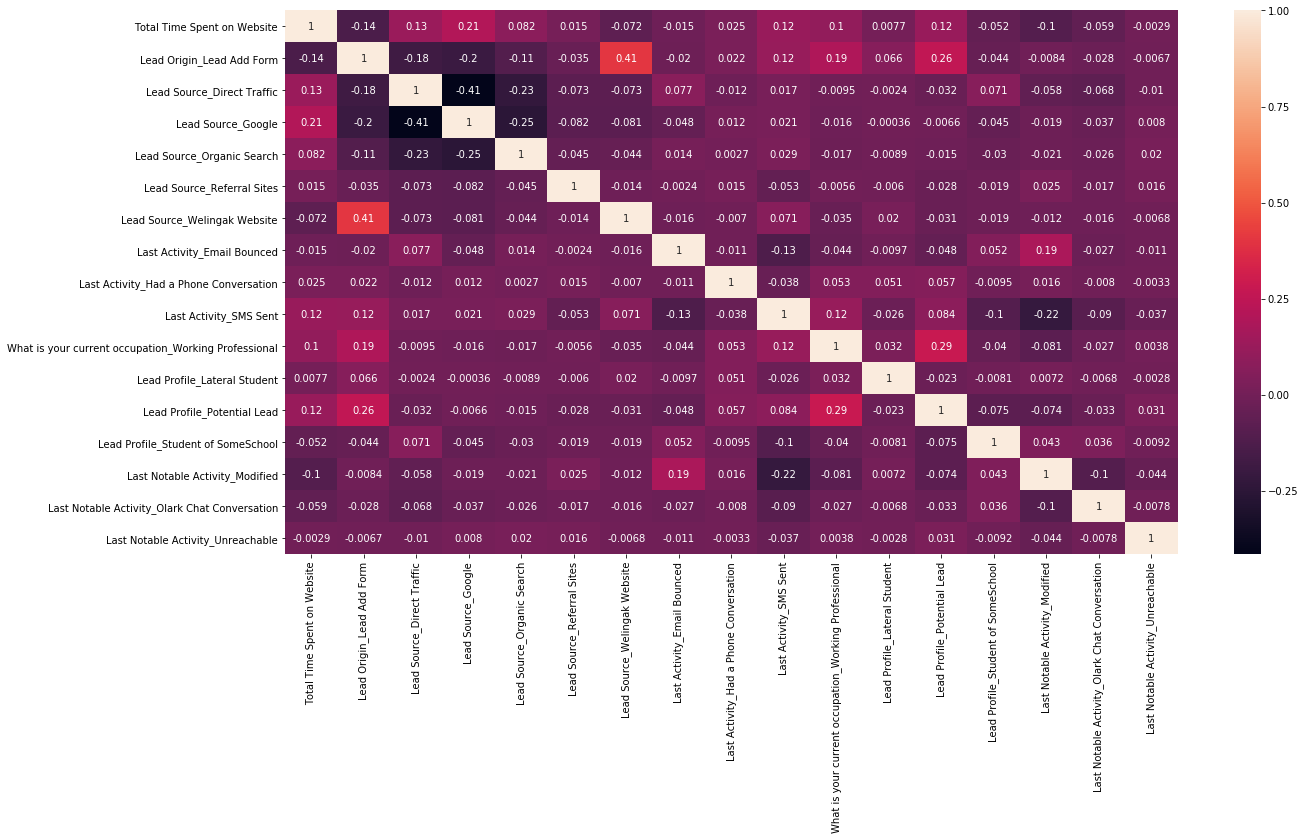

In [89]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train[col].corr(),annot = True)
plt.show()

## Metrics

In [90]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [91]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6987023519870236

In [92]:
# Let us calculate specificity
TN / float(TN+FP)

0.895552223888056

In [93]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10444777611194403


In [94]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8282874971111625


## ROC Curve

In [95]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [96]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Conversion, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

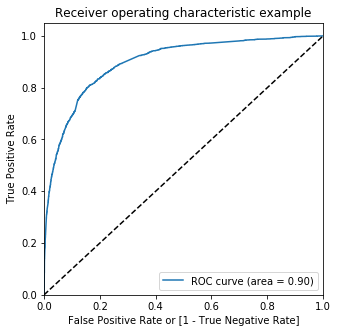

In [97]:
draw_roc(y_train_pred_final.Conversion, y_train_pred_final.Conversion_Prob)

### Finding Optimal Cutoff Point

In [100]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Conversion,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.206679,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.144887,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.243658,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.805704,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.081050,3934,0,1,0,0,0,0,0,0,0,0,0


In [101]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.654453  0.966342  0.462269
0.2   0.2  0.756957  0.924169  0.653923
0.3   0.3  0.811224  0.844282  0.790855
0.4   0.4  0.828695  0.787105  0.854323
0.5   0.5  0.820501  0.698702  0.895552
0.6   0.6  0.817873  0.649635  0.921539
0.7   0.7  0.800093  0.555556  0.950775
0.8   0.8  0.778139  0.463909  0.971764
0.9   0.9  0.731602  0.310624  0.991004


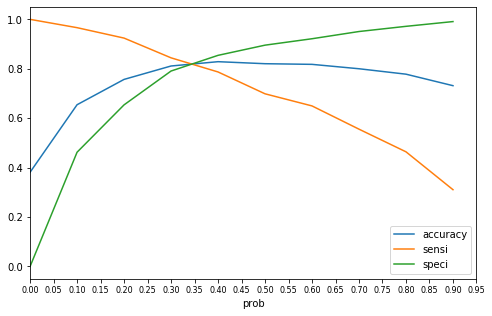

In [102]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(8,5))
plt.xticks(np.arange(0, 1, step=0.05), size = 8)
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [103]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Conversion,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.206679,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.144887,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.243658,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.805704,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.081050,3934,0,1,0,0,0,0,0,0,0,0,0,0


In [104]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.final_predicted)

0.8225108225108225

In [105]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.final_predicted )
confusion2

array([[3316,  686],
       [ 462, 2004]], dtype=int64)

In [106]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [107]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8126520681265207

In [108]:
# Let us calculate specificity
TN / float(TN+FP)

0.8285857071464268

In [109]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1714142928535732


In [110]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7449814126394052


In [111]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8777130757014293


## Precision and Recall

In [112]:
#Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8047641289117234

In [113]:
#Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6987023519870236

In [114]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

In [115]:
?precision_score

In [116]:
precision_score(y_train_pred_final.Conversion, y_train_pred_final.predicted)

0.8047641289117234

In [117]:
recall_score(y_train_pred_final.Conversion, y_train_pred_final.predicted)

0.6987023519870236

### Precision and Recall trade-off

In [118]:
y_train_pred_final.Conversion, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
 5       1
 6       0
 7       1
 8       0
 9       1
 10      1
 11      0
 12      1
 13      1
 14      0
 15      0
 16      0
 17      0
 18      0
 19      1
 20      1
 21      1
 22      1
 23      1
 24      1
 25      1
 26      0
 27      1
 28      1
 29      0
        ..
 6438    1
 6439    0
 6440    1
 6441    1
 6442    0
 6443    0
 6444    0
 6445    0
 6446    0
 6447    0
 6448    0
 6449    0
 6450    1
 6451    1
 6452    1
 6453    1
 6454    1
 6455    1
 6456    1
 6457    1
 6458    0
 6459    1
 6460    1
 6461    0
 6462    1
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Conversion, Length: 6468, dtype: int64, 0       0
 1       0
 2       0
 3       1
 4       0
 5       1
 6       0
 7       1
 8       0
 9       1
 10      1
 11      0
 12      0
 13      0
 14      0
 15      0
 16      0
 17      0
 18      0
 19      0
 20      1
 21      1
 22      1
 23      1
 24      1
 25     

In [119]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Conversion, y_train_pred_final.Conversion_Prob)

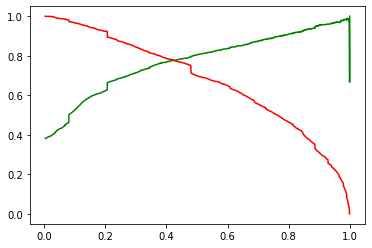

In [120]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Make predictions on the test set

In [121]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [122]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Lead Profile_Lateral Student,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
4269,0.964504,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2376,-0.885371,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7766,-0.777416,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
9199,-0.885371,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4359,-0.885371,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [123]:
X_test_sm = sm.add_constant(X_test)

In [124]:
y_test_pred = res.predict(X_test_sm)

In [125]:
y_test_pred[:10]

4269    0.631643
2376    0.885806
7766    0.835531
9199    0.344108
4359    0.928695
9186    0.877344
1631    0.818447
8963    0.503382
8007    0.062946
5324    0.327168
dtype: float64

In [126]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [127]:
# Let's see the head
y_pred_1.head()

,0
4269,0.631643
2376,0.885806
7766,0.835531
9199,0.344108
4359,0.928695


In [128]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [129]:
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [130]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [131]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [132]:
y_pred_final.head()

,Converted,LeadID,0
0,1,4269,0.631643
1,1,2376,0.885806
2,1,7766,0.835531
3,0,9199,0.344108
4,1,4359,0.928695


In [133]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})
y_pred_final

,Converted,LeadID,Conversion_Prob
0,1,4269,0.631643
1,1,2376,0.885806
2,1,7766,0.835531
3,0,9199,0.344108
4,1,4359,0.928695
5,1,9186,0.877344
6,1,1631,0.818447
7,1,8963,0.503382
8,0,8007,0.062946
9,1,5324,0.327168


In [134]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['LeadID','Converted','Conversion_Prob'], axis=1)

In [135]:
# Let's see the head of y_pred_final
y_pred_final.head()

,LeadID,Converted,Conversion_Prob
0,4269,1,0.631643
1,2376,1,0.885806
2,7766,1,0.835531
3,9199,0,0.344108
4,4359,1,0.928695


In [136]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [137]:
y_pred_final.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,4269,1,0.631643,1
1,2376,1,0.885806,1
2,7766,1,0.835531,1
3,9199,0,0.344108,0
4,4359,1,0.928695,1


In [138]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8253968253968254

In [139]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1459,  218],
       [ 266,  829]], dtype=int64)

In [140]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [141]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7570776255707763

In [142]:
# Let us calculate specificity
TN / float(TN+FP)

0.8700059630292188

37.75724258475665